In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster as clu
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import datasets as dat
from sklearn import decomposition as dec
from sklearn import manifold as man
from scipy.cluster import hierarchy
from sklearn import compose as com
import plotly.graph_objects as go
from sklearn import neighbors as nn
from sklearn import metrics as met

# ***Question1***

In [ ]:
data = pd.read_csv("drinks.csv")
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
#Before I delete the fields over data, I add them to the list because I will use it for visualization. 
country_names = data["country"]  
continent_names = data["continent"]

In [ ]:
data.drop(["country", "continent"], axis=1, inplace=True)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


 In order to decide the number of clusters  in dataset, I used the elbow technique.





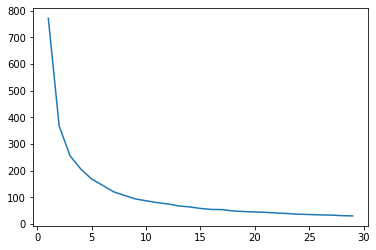

In [ ]:
x_values = []
y_values = []

for i in range(1, 30): #We tried the number of cluster  from 1 to 30.
  pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
  ])
  pipe.fit(data)
  x_values.append(i)
  y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)
plt.show()

Inertia value becomes more stable after 10 in the graph.However, I added PCA into the pipeline to decide the number of clusters.





In [ ]:
#I decided how many components we will use for PCA 
pipe = pip.Pipeline([
        ("scaler", pre.StandardScaler()),
        ("pca", dec.PCA(random_state=42)),
])
pipe.fit(data)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [ ]:
def plot_component_cumulative_importance(pipe_pca, stepName):
  ratios = pipe_pca.named_steps[stepName].explained_variance_ratio_

  x_values = []
  y_values = []

  total = 0
  for i in range(0, len(ratios)):
    x_values.append(i+1)
    total += ratios[i]
    y_values.append(total)

  plt.plot(x_values, y_values)
  plt.grid(True)
  plt.show()

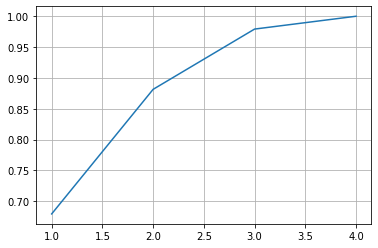

In [ ]:
plot_component_cumulative_importance(pipe, "pca")

In [ ]:
pipe[1].explained_variance_ratio_[:3].sum() #Using 3 components explains 97% of the data

0.9791907110535106

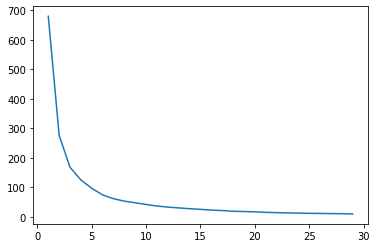

In [ ]:
x_values = []
y_values = []

for i in range(1, 30):
  pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("pca", dec.PCA(n_components=2)),
          ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
  ])
  pipe.fit(data)
  x_values.append(i)
  y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)
plt.show()

In [ ]:
#we see that the graph has not changed. 10 cluster seems ideal.
pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("kmeans", clu.KMeans(n_clusters=10, random_state=42))
  ])
pipe.fit(data)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = country_names,
    locationmode = "country names",
    z = pipe[1].labels_,
    text = country_names,
    colorscale = 'RdBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'ClusterNo:',
))

fig.update_layout(
    title_text='Clustering Results',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

# Question2

In [ ]:
c_housing = pd.read_csv("housing.csv")
c_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
c_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


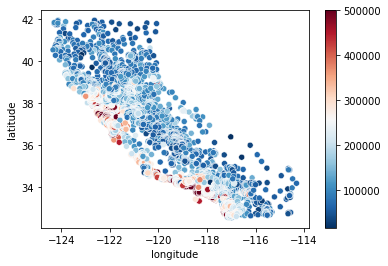

In [ ]:
#First, I displayed the median house value information based on latitude and longitude 
from mpl_toolkits.axes_grid1 import make_axes_locatable
x_value=c_housing["longitude"]
y_value=c_housing["latitude"]
ax=sns.scatterplot(x=x_value, y=y_value, hue=c_housing["median_house_value"],palette="RdBu_r")
norm = plt.Normalize(c_housing["median_house_value"].min(),c_housing["median_house_value"].max())
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
ax.get_legend().remove()
sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()
  

In [ ]:
median_house_values = c_housing["median_house_value"] #I drop the median_house_value feature so as not to create a bias.
c_housing.drop(["median_house_value"], axis=1, inplace=True)
c_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


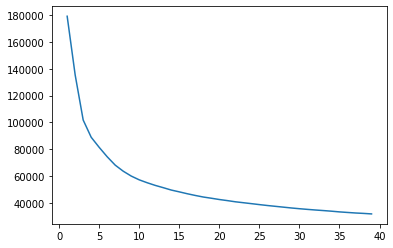

In [ ]:
#Kmeans
x_values = []
y_values = []
from sklearn.impute import  SimpleImputer
#for categorical variables
pipe_cat = pip.Pipeline([
            ("one_hot", pre.OneHotEncoder(handle_unknown="ignore", sparse=False))
])
#for numeric variables
#We see that there is a missing value in the total_bedrooms. I used imputer for missing values.
pipe_num = pip.Pipeline([
                         ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                         ("scaler", pre.StandardScaler())
])

ct = com.ColumnTransformer([
              ("num", pipe_num, c_housing.select_dtypes(exclude="object").columns),
              ("cat", pipe_cat, ["ocean_proximity"]),
])

#to use elbow technique to decide k value for KMeans
for i in range(1, 40):
  pipe = pip.Pipeline([
                       ("ct", ct),
                       ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
  ])
  pipe.fit(c_housing)
  x_values.append(i)
  y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)
plt.show()

In [ ]:
#Inertia becomes more stable after 25 clusters.
pipe = pip.Pipeline([
                       ("ct", ct),
                       ("kmeans", clu.KMeans(n_clusters=25, random_state=42))
  ])
pipe.fit(c_housing)

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                         

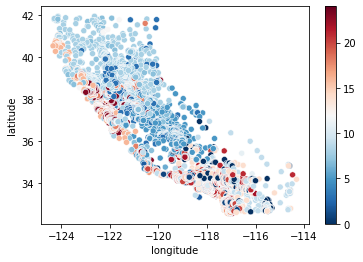

In [ ]:
#Although I tried multiple clusters and plotted graphics, there was not a very good visualization. It was not successful in clustering.
x_value=c_housing["longitude"]
y_value=c_housing["latitude"]
ax=sns.scatterplot(x=x_value, y=y_value, hue=pipe.named_steps["kmeans"].labels_,palette="RdBu_r")
norm = plt.Normalize(pipe.named_steps["kmeans"].labels_.min(),pipe.named_steps["kmeans"].labels_.max())
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
ax.get_legend().remove()
sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()

In [ ]:
#DBSCAN algorithm
#I used NearestNeighbors techniques  to find the nearest 10 samples
pipe_nn = pip.Pipeline([
              ("ct", ct),
              ("nn", nn.NearestNeighbors(n_neighbors=10, algorithm="kd_tree"))])

In [ ]:
pipe_nn.fit(c_housing)

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                         

In [ ]:
distances, indices=pipe_nn[1].kneighbors()


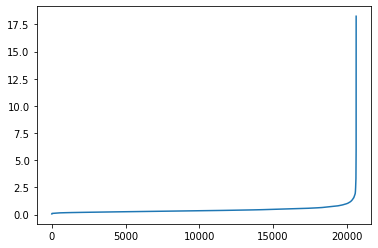

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

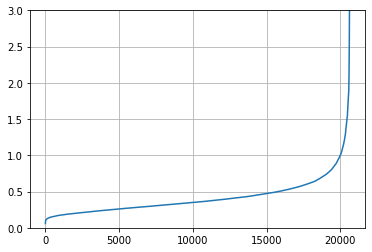

In [ ]:
# I selected 1 as optimal eps value becasue after a value of 1, it has increased suddenly.
plt.ylim(0,3)
plt.grid(True)
plt.plot(distances)

In [ ]:
pipe_dbscan = pip.Pipeline([
              ("ct", ct),
              ("dbscan", clu.DBSCAN(eps=1, algorithm="kd_tree", min_samples=10))])

In [ ]:
pipe_dbscan.fit(c_housing)

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                         

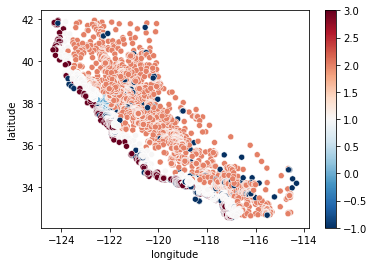

In [ ]:
#DBSCAN algorithm was able to cluster better than Kmeans.
#DBSCAN is more similar when compared to our first chart(the median house value information based on latitude and longitude features)
#The prices of the houses on the ocean shore were higher, when we look at the graph, we can easily see this distinction.
x_value=c_housing["longitude"]
y_value=c_housing["latitude"]
ax=sns.scatterplot(x=x_value, y=y_value, hue=pipe_dbscan.named_steps["dbscan"].labels_,palette="RdBu_r")
norm = plt.Normalize(pipe_dbscan.named_steps["dbscan"].labels_.min(),pipe_dbscan.named_steps["dbscan"].labels_.max())
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
ax.get_legend().remove()
sm.set_array([])

ax.figure.colorbar(sm)
plt.show()